<a href="https://colab.research.google.com/github/shadowpeasant/aiup/blob/main/day2-pm/lab1/day2pm_lab1_colab_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.nyp.edu.sg/content/dam/nyp/logo.png" width='200'/>

Welcome to the lab! Before we get started here are a few pointers on Jupyter notebooks.

1. The notebook is composed of cells; cells can contain code which you can run, or they can hold text and/or images which are there for you to read.

2. You can execute code cells by clicking the ```Run``` icon in the menu, or via the following keyboard shortcuts ```Shift-Enter``` (run and advance) or ```Ctrl-Enter``` (run and stay in the current cell).

3. To interrupt cell execution, click the ```Stop``` button on the toolbar or navigate to the ```Kernel``` menu, and select ```Interrupt ```.


# Lab 1 - Sentiment Analysis with Scikit-Learn

In this lab exercise, we will learn how to perform Sentiment Analysis with Scikit-Learn, a popular Machine Learning toolkit for Classical Machine Learning. Sentiment Analysis is a Text Classification task where you model learns how to classify a paragraph or a document of text into whether it is a positive or a negative sentiment.

We will explore using TF-IDF and various Classical Machine Learning algorithms such as Naive Bayes and SVM to classify whether sentiments of movie reviews are positive or negative.

In [1]:
!wget https://nyp-aicourse.s3-ap-southeast-1.amazonaws.com/aiup/day2-pm/lab1/lab1.zip
!unzip lab1.zip

from helpers import *
print ("Importing helpers complete.")

--2023-11-17 05:32:02--  https://nyp-aicourse.s3-ap-southeast-1.amazonaws.com/aiup/day2-pm/lab1/lab1.zip
Resolving nyp-aicourse.s3-ap-southeast-1.amazonaws.com (nyp-aicourse.s3-ap-southeast-1.amazonaws.com)... 3.5.150.182, 3.5.151.180, 52.219.125.3, ...
Connecting to nyp-aicourse.s3-ap-southeast-1.amazonaws.com (nyp-aicourse.s3-ap-southeast-1.amazonaws.com)|3.5.150.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52678994 (50M) [application/zip]
Saving to: ‘lab1.zip’

lab1.zip            100%[===================>]  50.24M  11.7MB/s    in 4.7s    

2023-11-17 05:32:08 (10.7 MB/s) - ‘lab1.zip’ saved [52678994/52678994]

Archive:  lab1.zip
   creating: models/
  inflating: helpers.py              
   creating: data/
  inflating: data/IMDB Dataset.csv   
  inflating: data/test.csv           
  inflating: data/train.csv          


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Importing helpers complete.


[nltk_data] Downloading package wordnet to /root/nltk_data...


## Section 1.1 - Explore Your Data

Take a look at the IMDB Dataset.csv to see format of the text file that we will be using for this exercise. If you intend to use this set of Jupyter Notebooks later for your own Sentiment Analysis projects, please ensure that you collect your data in this format.

There are 50,000 rows in the IMDB Dataset.csv file. We used Excel to cut out 40,000 rows and saved them into the train.csv file, and the remaining 10,000 rows, into the test.csv file.

In [2]:

import pandas as pd

#csv file name to be read in

in_csv = 'data/IMDB Dataset.csv'

#get the number of lines of the csv file to be read

number_lines = sum(1 for row in (open(in_csv)))

#size of rows of data to write to the csv,

#you can change the row size according to your need

rowsize = 10000

#start looping through data writing it to a new file for each set

for i in range(1,number_lines,rowsize):

    df = pd.read_csv(in_csv,

          header=None,

          nrows = rowsize,#number of rows to read at each loop

          skiprows = i)#skip rows that have been read


    #csv to write data to a new file with indexed name. input_1.csv etc.

    out_csv = 'train' + str(i) + '.csv'


    df.to_csv(out_csv,

          index=False,

          header=False,

          mode='a',#append data to csv file

          chunksize=rowsize)#size of data to append for each loop

## Section 1.2 - Load Data from CSV

Update the following code to load the training and test data from the correct CSV file path, and indicate the appropriate column names to extract the input text, and output classification label.

The path to the training file should be **"data/train.csv"**, and the path to the test file should be **"test.csv"**. The column names to the input text and output labels can be found in the train.csv and test.csv files.


In [6]:
# TODO: Set the filename to the path containing our training and test files.
#
load_text_data_from_csv_for_scikit(
    "data/train.csv",                           # The training CSV file
    "data/test.csv",                           # The test CSV file
    "review",                           # The column in the CSV used as the input text
    "sentiment")                              # The column in the CSV used as the output classification label

Loading training data...
Loading test data...
Loading complete.
Loading training data...
Loading test data...
Loading complete.


## Section 1.3 - Display Loaded Data

Run the following code to display the training data that we have loaded.

Can you identify which parts are the input texts, and which parts are the output labels?

In [7]:
display_trainx_trainy()


["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the f

## Section 1.4 - Create the Classical Machine Learning Text Classification Model

The following creates the Classical Machine Learning model for our Text Classification task.

We have written codes for you to create a model with Naive Bayes, or SVM. Let's start with Naive Bayes first.



In [8]:
# TODO:
# Run either this or SVM.
#
create_text_classifier_model_naivebayes(
    1.0,        # Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).
    True,       # Whether to learn class prior probabilities or not. If false, a uniform prior will be used.
    None        # Prior probabilities of the classes. If specified the priors are not adjusted according to the data.
)


In [9]:
# TODO:
# Run either this or Naive Bayes.
#
create_text_classifier_model_svm()


## Section 1.5 - Training and Evaluating the Model

Run the following cell to perform the training. The data pipeline set up in Scikit-Learn in the helpers already uses NLTK to tokenize (split into words) and lemmatize (convert words into root forms) before converting it into Bag-of-Words + TF-IDF counts and then passing that count into the Machine Learning model.

This is how the processing pipeline for Natural Language Processing in Scikit-Learn will look like.

<img src="https://nyp-aicourse.s3-ap-southeast-1.amazonaws.com/resources/day2-pm/scikit.PNG" />

Once the training is complete, review the results below and look at how well your model is fairing. Take a look at the test data's F1 score, because it is a meaningful metric that tells us how well our model works for data that doesn't exist in the training set.


Training classifier...


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


-- Epoch 1
Norm: 48.76, NNZs: 95825, Bias: 0.084477, T: 40000, Avg. loss: 0.361298
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 46.91, NNZs: 105116, Bias: 0.022946, T: 80000, Avg. loss: 0.285658
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 46.52, NNZs: 107285, Bias: 0.028577, T: 120000, Avg. loss: 0.276398
Total training time: 0.15 seconds.
-- Epoch 4
Norm: 46.40, NNZs: 108127, Bias: 0.032707, T: 160000, Avg. loss: 0.271575
Total training time: 0.19 seconds.
-- Epoch 5
Norm: 46.25, NNZs: 108651, Bias: 0.024249, T: 200000, Avg. loss: 0.267897
Total training time: 0.24 seconds.
-- Epoch 6
Norm: 46.24, NNZs: 108982, Bias: 0.024083, T: 240000, Avg. loss: 0.266301
Total training time: 0.28 seconds.
-- Epoch 7
Norm: 46.26, NNZs: 109129, Bias: 0.026062, T: 280000, Avg. loss: 0.264869
Total training time: 0.31 seconds.
-- Epoch 8
Norm: 46.30, NNZs: 109223, Bias: 0.020760, T: 320000, Avg. loss: 0.263712
Total training time: 0.35 seconds.
-- Epoch 9
Norm: 46.29, NNZs: 109320, Bias:

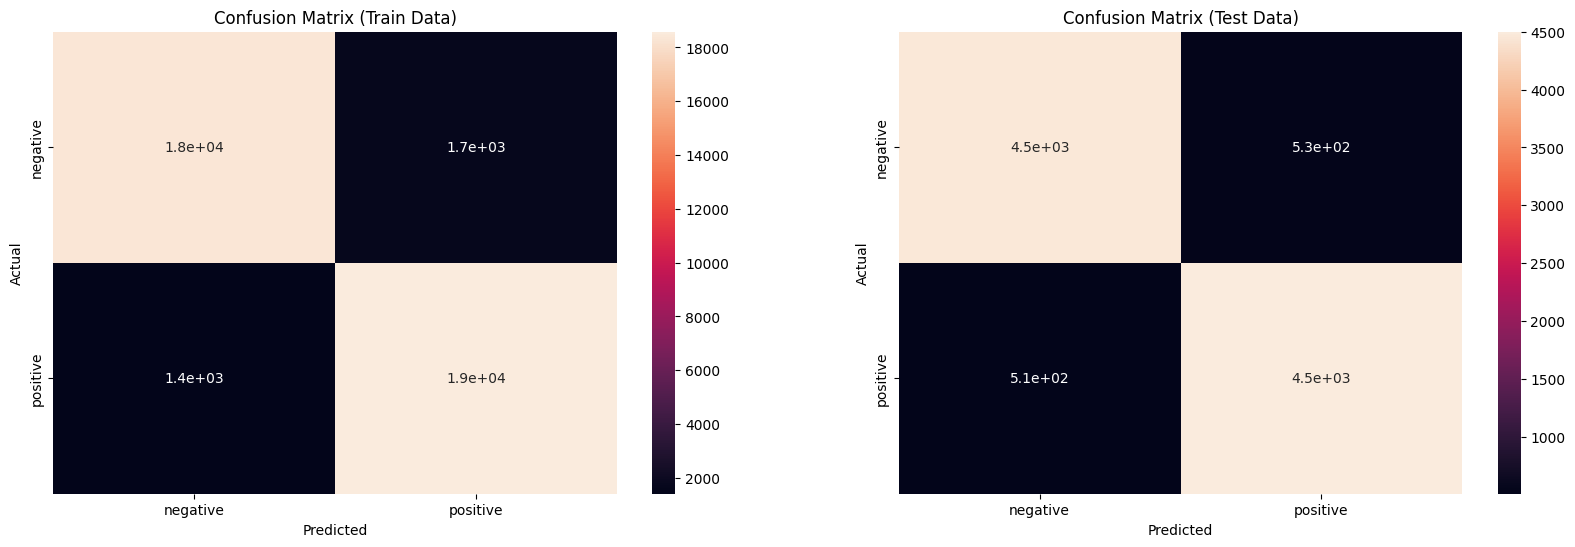

Train Data
--------------------------------------------------------
              precision    recall  f1-score   support

    negative       0.93      0.92      0.92     20007
    positive       0.92      0.93      0.92     19993

    accuracy                           0.92     40000
   macro avg       0.92      0.92      0.92     40000
weighted avg       0.92      0.92      0.92     40000


Test Data
--------------------------------------------------------
              precision    recall  f1-score   support

    negative       0.90      0.89      0.90      4993
    positive       0.89      0.90      0.90      5007

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [10]:
train_text_classifier_model()


## Section 1.6 - Saving the Model

Let's save the model into a file that we can reload and use later on.

Once you have run the following cell, take a look at the file in the folder.

If you trained using Naive Bayes, we recommend that you save into a file name such as **"models/naivebayes.scikit"**. If you trained your model with SVM, save into a file name such as **"models/svm.scikit"**.

Once you have saved the model, head back to Step 1.4 to try and train your text classification task with another Machine Learning model.

In [11]:
# TODO:
# Give the model a file name.
#
save_text_classifier_model("models/naivebayes.scikit")

## Section 1.7 - Loading the Model

Update the following cell to provide the file name of your model and run the cell.

In [12]:
# TODO:
# Update the file name of the model that you want to load.
#
load_text_classifier_model("models/naivebayes.scikit")

## Section 1.8 - Testing the Model

Let's try to run the following cell to test our model. When prompted for an input, enter any line of text and see what your machine learning model has classified the text as.

Try also to load the Naive Bayes model, and load the SVM models and try the text classification for both models.

Discuss your findings.

1. Which model was more accurate based on the F1-score calculated after training?

2. Do you think that the classification has been accurate when you actually tried the model?

3. What else can you do to improve the accuracy of the model?


In [14]:
print ("Enter some text:")
user_text = input()
classify_text(user_text)


Enter some text:
horrendous
You entered: horrendous
Classification result:
negative


## Section 1.9 - Explore the helpers.py code

Take a look at the code within the helpers.py file to see the codes that load the training and test data, create the Machine Learning model, train the model and perform classification.